<a href="https://colab.research.google.com/github/Lilwm/Imbalanced-Classification-Project/blob/main/Bank_Churn_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Churn Predictions

#1. Defining the Question

## a) Specifying the Data Analysis Question
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones. We need to predict whether a customer will leave the bank soon.

## b) Defining the Metric for Success
The solution will have satisfied the research question when you can come up with a model to predict whether a customer will churn or not

Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.

## c) Understanding the context
You have the data on clients’ past behavior and termination of contracts with the bank.

## d) Recording the Experimental Design
The steps to be taken include:

Data Importation
Data Exploration.
Data Cleaning.
Data Preparation
Data Modeling (Using Decision Trees, Random Forest and Logistic Regression)
Model Evaluation
Hyparameter Tuning
Findings and Recommendations.

## e) Data Relevance
The data contains customer behaviour and whether the customer exited the bank or not, hence relevant for our study

# 2. Data Cleaning & Preparation

## a) Importing the relevant libraries

In [25]:
# import data analysis libraries
import pandas as pd
import numpy as np

# import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# since this problem is a classification challenge, we shall import the relevant classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# import function to split the data into training and validation set
from sklearn.model_selection import train_test_split

# import scoring metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# import a scaler to standardize the featurs
from sklearn.preprocessing import StandardScaler

# import scipy to help in removing outliers
from scipy.stats import zscore

# libraries for model hyperparameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# for model reporting
from sklearn.metrics import classification_report

# for shuffling
from sklearn.utils import shuffle

# suppress warnings
import warnings

In [26]:
# suppress warnings
warnings.filterwarnings('ignore')

  ## b) Data Importation

In [27]:
# import the data and preview it
df = pd.read_csv('https://bit.ly/2XZK7Bo') 
# determine the size of the dataset
print(df.shape)

# explore the first and last 5 records
df

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


## c) Data Exploration and Data Cleaning

In [28]:
# check the column names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [29]:
# check for data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [30]:
# an overview of the data distribution
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


####Observation
The variables contain different range of values hence we shall need to standardize them

In [31]:
# check for null values
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

There are 909 records with blank tenure we need to replace them with their mean

In [32]:
df[df['Tenure'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [33]:
null_index = df[df['Tenure'].isnull()].index
null_index

Int64Index([  30,   48,   51,   53,   60,   82,   85,   94,   99,  111,
            ...
            9914, 9923, 9925, 9931, 9938, 9944, 9956, 9964, 9985, 9999],
           dtype='int64', length=909)

In [34]:
# fill the blank tenures with mean
df.Tenure = df.Tenure.fillna(df.Tenure.mean())

# check their values again
df.iloc[null_index]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,4.99769,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,4.99769,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,4.99769,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,4.99769,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,4.99769,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,4.99769,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,4.99769,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,4.99769,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,4.99769,123841.49,2,1,0,96833.00,0


In [35]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

All blank tenure records have been populated with the mean

In [36]:
# check for duplicates
df.duplicated().sum()

0

In [37]:
# check for unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                12
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Our target variable (Exited) has only two categories, so we are good

# 3. Data Analysis
## a) Research-specific Analysis
What percentage of customers from our dataset churned

0    7963
1    2037
Name: Exited, dtype: int64


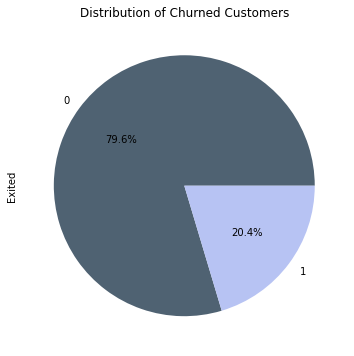

In [84]:
# plotting a pie chart to investigate whether patients had diabetes or not
print(df.Exited.value_counts())
colors =['#4F6272', '#B7C3F3']
df.Exited.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', figsize = [8, 6], colors=colors)
plt.title("Distribution of Churned Customers")
plt.show()

## b) Check for correlation between columns

In [39]:
# check for correlation between features
corr = df.corr()
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006975,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.020329,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000059,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.012604,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006975,-0.020329,-0.000059,-0.012604,1.000000,-0.007534,0.011409,0.025978,-0.030680,0.010050,-0.015988
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007534,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.025978,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.030680,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010050,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


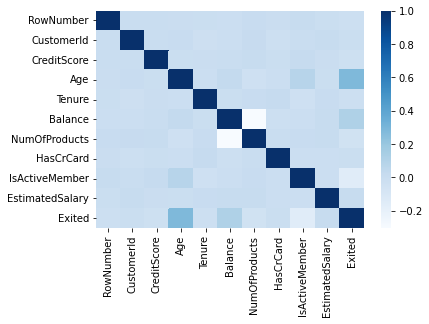

In [88]:
# plot the heatmap
sns.heatmap(corr, cmap="Blues")

In [41]:
corr.Exited.abs().sort_values(ascending=False)

Exited             1.000000
Age                0.285323
IsActiveMember     0.156128
Balance            0.118533
NumOfProducts      0.047820
CreditScore        0.027094
RowNumber          0.016571
Tenure             0.015988
EstimatedSalary    0.012097
HasCrCard          0.007138
CustomerId         0.006248
Name: Exited, dtype: float64

## Observation
All features do not have a good correlation with the target.
However, the following are better predictors:

* Age
* IsActiveMember
* Balance

The following are poor predictors:

* NumOfProducts
* CreditScore
* RowNumber
* Tenure
* EstimatedSalary
* HasCrCard
* CustomerId

## c) Check for presence of outliers

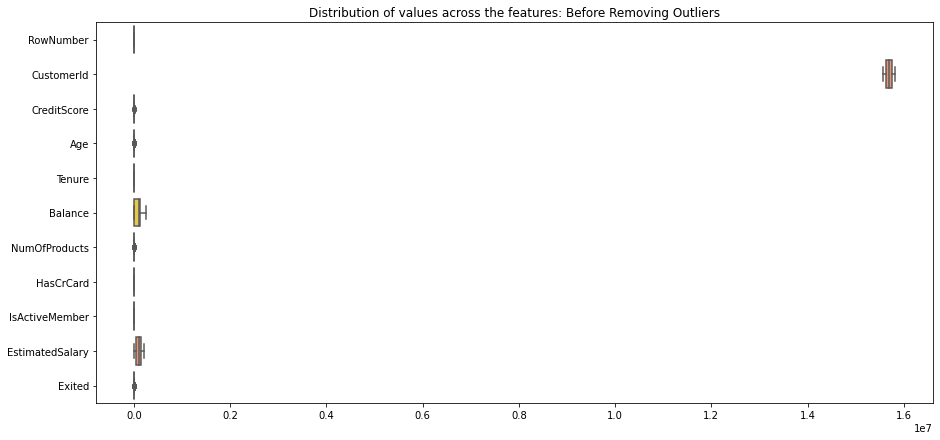

In [42]:
fig = plt.subplots(figsize=(15,7))
ax = sns.boxplot(data=df,orient="h", palette="Set2")
plt.title('Distribution of values across the features: Before Removing Outliers')

# display the graph
plt.show()

# 4. Data Preparation

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [44]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [45]:
# get the features and targets
target = df['Exited']
features = df.drop(['RowNumber', 'CustomerId','Surname','Geography','Gender','Exited'], axis=1)
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2.0,0.00,1,1,1,101348.88
1,608,41,1.0,83807.86,1,0,1,112542.58
2,502,42,8.0,159660.80,3,1,0,113931.57
3,699,39,1.0,0.00,2,0,0,93826.63
4,850,43,2.0,125510.82,1,1,1,79084.10


In [46]:
# split the data into training and validation sets
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

In [47]:
print('Features Train Shape: ', features_train.shape, '\nFeatures Validation Shape: ',features_valid.shape, 
      '\nTarget Train Shape: ',target_train.shape, '\nTarget Validation Shape: ',target_valid.shape)

Features Train Shape:  (7500, 8) 
Features Validation Shape:  (2500, 8) 
Target Train Shape:  (7500,) 
Target Validation Shape:  (2500,)


#5. Data Modeling

##a) Train logistic regression model where class_weight is balanced

In [48]:
log_reg_model = LogisticRegression(random_state=12345,class_weight='balanced',solver='liblinear')
log_reg_model.fit(features_train,target_train)
pred_valid = log_reg_model.predict(features_valid)
print('F1 Score: ', f1_score(target_valid, pred_valid))

F1 Score:  0.4494103041589074


## b) Train Decision Tree Model

In [50]:
# check for optimal max_depth
for i in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=i, random_state=12345,class_weight='balanced')
    dt_model.fit(features_train,target_train)
    pred_valid = dt_model.predict(features_valid)
    print('Max Depth: ',i,'F1 Score: ', f1_score(target_valid, pred_valid))

Max Depth:  1 F1 Score:  0.5070202808112324
Max Depth:  2 F1 Score:  0.5391566265060241
Max Depth:  3 F1 Score:  0.5391566265060241
Max Depth:  4 F1 Score:  0.5440414507772021
Max Depth:  5 F1 Score:  0.5964343598055106
Max Depth:  6 F1 Score:  0.5883244882486732
Max Depth:  7 F1 Score:  0.5725018782870022
Max Depth:  8 F1 Score:  0.5562310030395137
Max Depth:  9 F1 Score:  0.5575289575289575


The best decision tree occurs at **max_depth = 5, score = 0.5964343598055106**

## c) Train Random Forest Model

In [51]:
# check for optimal max_depth
for i in range(1,26):
    rf_model = RandomForestClassifier(max_depth=5,n_estimators=i,class_weight='balanced', random_state=12345)
    rf_model.fit(features_train,target_train)
    pred_valid = rf_model.predict(features_valid)
    print('Max Depth: ',i,'F1 Score: ', f1_score(target_valid, pred_valid))

Max Depth:  1 F1 Score:  0.5378787878787878
Max Depth:  2 F1 Score:  0.5421785421785422
Max Depth:  3 F1 Score:  0.5743834526650755
Max Depth:  4 F1 Score:  0.5837479270315091
Max Depth:  5 F1 Score:  0.5808636748518206
Max Depth:  6 F1 Score:  0.5788590604026845
Max Depth:  7 F1 Score:  0.5742411812961444
Max Depth:  8 F1 Score:  0.5739692805173807
Max Depth:  9 F1 Score:  0.5869037995149555
Max Depth:  10 F1 Score:  0.5846407927332783
Max Depth:  11 F1 Score:  0.594238683127572
Max Depth:  12 F1 Score:  0.5951219512195122
Max Depth:  13 F1 Score:  0.5998370008149959
Max Depth:  14 F1 Score:  0.596774193548387
Max Depth:  15 F1 Score:  0.5929487179487181
Max Depth:  16 F1 Score:  0.5948553054662379
Max Depth:  17 F1 Score:  0.5987055016181229
Max Depth:  18 F1 Score:  0.6009771986970683
Max Depth:  19 F1 Score:  0.6021155410903173
Max Depth:  20 F1 Score:  0.593724859211585
Max Depth:  21 F1 Score:  0.5928286852589641
Max Depth:  22 F1 Score:  0.5902668759811618
Max Depth:  23 F1 Scor

The best random forest occurs at **n_estimators=19, score = 0.6021155410903173**

# 6. Class Weight adjustment

## a) Upsampling

In [59]:
# upsampling method
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # upsample the minority class
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # shuffle the upsampled features and targets
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled ,random_state=12345)
    
    return features_upsampled, target_upsampled

**i) Train Logistic Regression Model**

In [60]:
for i in range(1,11):
    features_upsampled, target_upsampled = upsample(features_train,target_train,i)
    log_reg_model = LogisticRegression(random_state=12345,solver='liblinear')
    log_reg_model.fit(features_upsampled,target_upsampled)
    pred_valid = log_reg_model.predict(features_valid)
    print('Repeat : ',i,'F1 Score: ', f1_score(target_valid, pred_valid))

Repeat :  1 F1 Score:  0.10543657331136737
Repeat :  2 F1 Score:  0.3463687150837989
Repeat :  3 F1 Score:  0.43362136684996067
Repeat :  4 F1 Score:  0.4500929944203348
Repeat :  5 F1 Score:  0.43406022845275183
Repeat :  6 F1 Score:  0.42482758620689653
Repeat :  7 F1 Score:  0.4107744107744108
Repeat :  8 F1 Score:  0.39716312056737585
Repeat :  9 F1 Score:  0.3888470233609646
Repeat :  10 F1 Score:  0.38077769625825386


Best score is **Repeat : 4 F1 Score: 0.4500929944203348**

**ii) Train Decision Tree Model**

In [61]:
for i in range(1,11):
    features_upsampled, target_upsampled = upsample(features_train,target_train,i)
    dt_model = DecisionTreeClassifier(max_depth=5, random_state=12345)
    dt_model.fit(features_upsampled,target_upsampled)
    pred_valid = dt_model.predict(features_valid)
    print('Repeat : ',i,'F1 Score: ', f1_score(target_valid, pred_valid))

Repeat :  1 F1 Score:  0.5286236297198539
Repeat :  2 F1 Score:  0.6054687499999999
Repeat :  3 F1 Score:  0.618213660245184
Repeat :  4 F1 Score:  0.5964343598055106
Repeat :  5 F1 Score:  0.5646580907244414
Repeat :  6 F1 Score:  0.5245522819179664
Repeat :  7 F1 Score:  0.5245522819179664
Repeat :  8 F1 Score:  0.49869041382922996
Repeat :  9 F1 Score:  0.4736842105263158
Repeat :  10 F1 Score:  0.4736842105263158


Best score is **Repeat : 3 F1 Score: 0.618213660245184** 

**iii) Train Random Forest Model**

In [62]:
for i in range(1,11):
    features_upsampled, target_upsampled = upsample(features_train,target_train,i)
    rf_model = RandomForestClassifier(max_depth=5,n_estimators=19, random_state=12345)
    rf_model.fit(features_upsampled,target_upsampled)
    pred_valid = rf_model.predict(features_valid)
    print('Repeat : ',i,'F1 Score: ', f1_score(target_valid, pred_valid))

Repeat :  1 F1 Score:  0.4662251655629139
Repeat :  2 F1 Score:  0.5642701525054467
Repeat :  3 F1 Score:  0.5985790408525754
Repeat :  4 F1 Score:  0.5885931558935361
Repeat :  5 F1 Score:  0.5535595475715237
Repeat :  6 F1 Score:  0.5086505190311418
Repeat :  7 F1 Score:  0.48222565687789803
Repeat :  8 F1 Score:  0.4797160243407708
Repeat :  9 F1 Score:  0.45938104448742745
Repeat :  10 F1 Score:  0.4428571428571428


Best score is **Repeat : 3 F1 Score: 0.5985790408525754**

## b) Downsampling

In [63]:
# downsampling method
def upsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # upsample the minority class
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    # shuffle the upsampled features and targets
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled,random_state=12345)
    
    return features_downsampled, target_downsampled

** Train Random Forest**

In [64]:
for i in range(1,10):
    fraction = i/10
    features_downsampled, target_downsampled = upsample(features_train,target_train,fraction)
    log_reg_model = LogisticRegression(random_state=12345,solver='liblinear')
    log_reg_model.fit(features_downsampled, target_downsampled)
    pred_valid = log_reg_model.predict(features_valid)
    print('Fraction : ',fraction,'F1 Score: ', f1_score(target_valid, pred_valid))

Fraction :  0.1 F1 Score:  0.37994143484626647
Fraction :  0.2 F1 Score:  0.43451143451143454
Fraction :  0.3 F1 Score:  0.45533141210374645
Fraction :  0.4 F1 Score:  0.411764705882353
Fraction :  0.5 F1 Score:  0.3448275862068965
Fraction :  0.6 F1 Score:  0.2853470437017995
Fraction :  0.7 F1 Score:  0.23098591549295777
Fraction :  0.8 F1 Score:  0.15987933634992457
Fraction :  0.9 F1 Score:  0.036166365280289325


**ii) Train Decision Tree Model**

In [65]:
for i in range(1,10):
    fraction = i/10
    features_downsampled, target_downsampled = upsample(features_train,target_train,fraction)
    dt_model = DecisionTreeClassifier(max_depth=5, random_state=12345)
    dt_model.fit(features_downsampled, target_downsampled)
    pred_valid = dt_model.predict(features_valid)
    print('Fraction : ',fraction,'F1 Score: ', f1_score(target_valid, pred_valid))

Fraction :  0.1 F1 Score:  0.47129909365558914
Fraction :  0.2 F1 Score:  0.5291319857312723
Fraction :  0.3 F1 Score:  0.588410104011887
Fraction :  0.4 F1 Score:  0.6139917695473252
Fraction :  0.5 F1 Score:  0.6187175043327556
Fraction :  0.6 F1 Score:  0.5525114155251142
Fraction :  0.7 F1 Score:  0.5437788018433181
Fraction :  0.8 F1 Score:  0.5325301204819276
Fraction :  0.9 F1 Score:  0.5038363171355499


**iii) Train Random Forest Model**

In [66]:
for i in range(1,10):
    fraction = i/10
    features_downsampled, target_downsampled = upsample(features_train,target_train,fraction)
    rf_model = RandomForestClassifier(max_depth=5,n_estimators=19, random_state=12345)
    rf_model.fit(features_downsampled, target_downsampled)
    pred_valid = rf_model.predict(features_valid)
    print('Fraction : ',fraction,'F1 Score: ', f1_score(target_valid, pred_valid))

Fraction :  0.1 F1 Score:  0.4364736387208298
Fraction :  0.2 F1 Score:  0.5381679389312977
Fraction :  0.3 F1 Score:  0.5977917981072555
Fraction :  0.4 F1 Score:  0.6038461538461539
Fraction :  0.5 F1 Score:  0.5565217391304348
Fraction :  0.6 F1 Score:  0.5593607305936074
Fraction :  0.7 F1 Score:  0.5460992907801419
Fraction :  0.8 F1 Score:  0.5114503816793893
Fraction :  0.9 F1 Score:  0.49546044098573283


#7. Model Evaluation

Having trained multiple models the best one is the Decision Tree Model using downsmampling technique to handle class imbalance
The model had an F1 score of 0.6187175043327556 using a Fraction of 0.5 to downsample the most prevalent class

In [67]:
fraction = 0.5
features_downsampled, target_downsampled = upsample(features_train,target_train,fraction)
model = DecisionTreeClassifier(max_depth=5, random_state=12345)
model.fit(features_downsampled, target_downsampled)
pred_valid = model.predict(features_valid)
print('Fraction : ',fraction,'F1 Score: ', f1_score(target_valid, pred_valid))

Fraction :  0.5 F1 Score:  0.6187175043327556


## ROC curve

In [68]:
# calculate predicted probabilities
prob_pred = model.predict_proba(features_valid)

# pick the 1's only
prob_pred_ones = prob_pred[:,1]
prob_pred_ones

array([0.52574526, 0.29765886, 0.06484642, ..., 0.29765886, 0.52331606,
       0.26436782])

In [69]:
# get the tpr, fpr and thresholds
fpr, tpr, threshold = roc_curve(target_valid,prob_pred_ones)

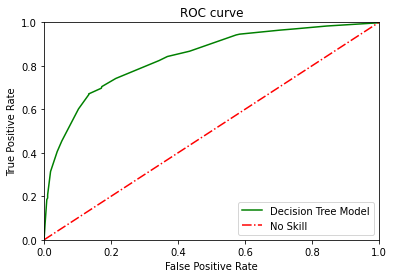

In [76]:
# let's plot the roc curve
plt.figure()

# < plot the graph >
plt.plot(fpr, tpr, label='Decision Tree Model', color= 'green')

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='dashdot', label='No Skill', color= 'red')

# < use the functions plt.xlim() and plt.ylim() to
#   set the boundary for the axes from 0 to 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < use the functions plt.xlabel() and plt.ylabel() to
#   name the axes "False Positive Rate" and "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# < add the heading "ROC curve" with the function plt.title() >
plt.title('ROC curve')
plt.legend()
plt.show()


# 8.Findings and Recommendations
**a) Compare the values predicted against the validation dataset**

check class distribution for the predictions

In [89]:
pred_valid_series = pd.Series(pred_valid)
predicted_class_frequency = pred_valid_series.value_counts(normalize=True)
predicted_class_frequency

0    0.7524
1    0.2476
dtype: float64

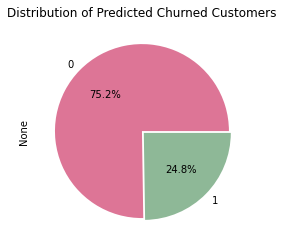

In [91]:
colors = ['#DD7596', '#8EB897']
predicted_class_frequency.plot(kind = 'pie', autopct = '%0.1f%%', colors = colors, figsize = [6, 4], explode = (0, 0.03))
plt.title("Distribution of Predicted Churned Customers")
plt.show()


In [ ]:
#check class distribution for the validation target
target_frequency = target_valid.value_counts(normalize=True)
target_frequency

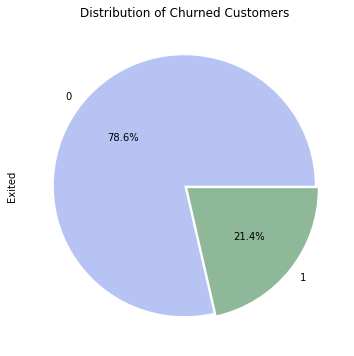

In [94]:
# plotting a pie chart to investigate whether customers churned or not
colors = ['#B7C3F3','#8EB897']
target_valid.value_counts().plot(kind = 'pie', colors = colors, autopct = '%0.1f%%', figsize = [8, 6], explode = (0, 0.03))
plt.title("Distribution of Churned Customers")
plt.show()

**Conclusion**

Beta Bank can rely on the Decision Tree to predict if a customer is likely to churn and make necessary arrangements to keep the customer